In [22]:
import os
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
from src.data_loader import load_data, preprocess_data

In [4]:
# Load model
model = joblib.load('../models/fraud_detection_model.pkl')

In [5]:
# Load data
data = load_data('../data/raw/creditcard.csv')
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)

In [7]:
# Convert X_test back to DataFrame with correct columns
X_test = pd.DataFrame(X_test, columns=data.drop('Class', axis=1).columns)

In [8]:
# Sample a smaller batch
X_test_sample = X_test.sample(n=500, random_state=42)

In [9]:
# Create SHAP explainer
explainer = shap.TreeExplainer(model)

In [10]:
# Calculate SHAP values for the sample
shap_values = explainer.shap_values(X_test_sample)

In [15]:
print(type(shap_values))
print(len(shap_values))
print(np.array(shap_values).shape)


<class 'numpy.ndarray'>
500
(500, 30, 2)


In [16]:
shap_values_fraud = shap_values[:, :, 1]


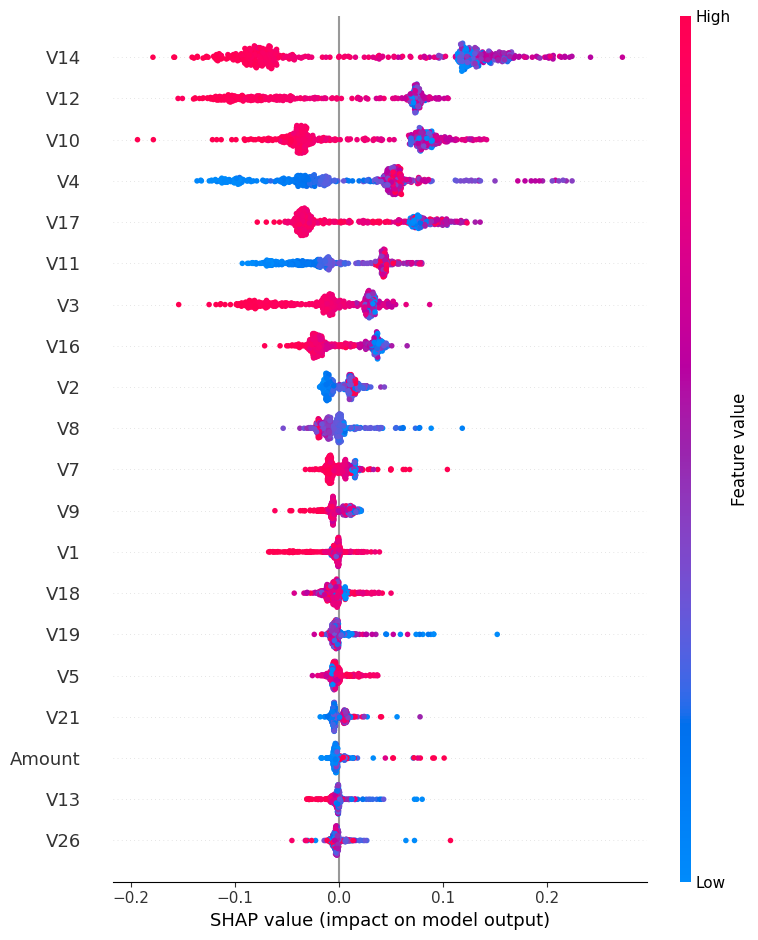

In [17]:

# Plot summary
shap.summary_plot(shap_values_fraud, X_test_sample)

Generating SHAP bar plot...


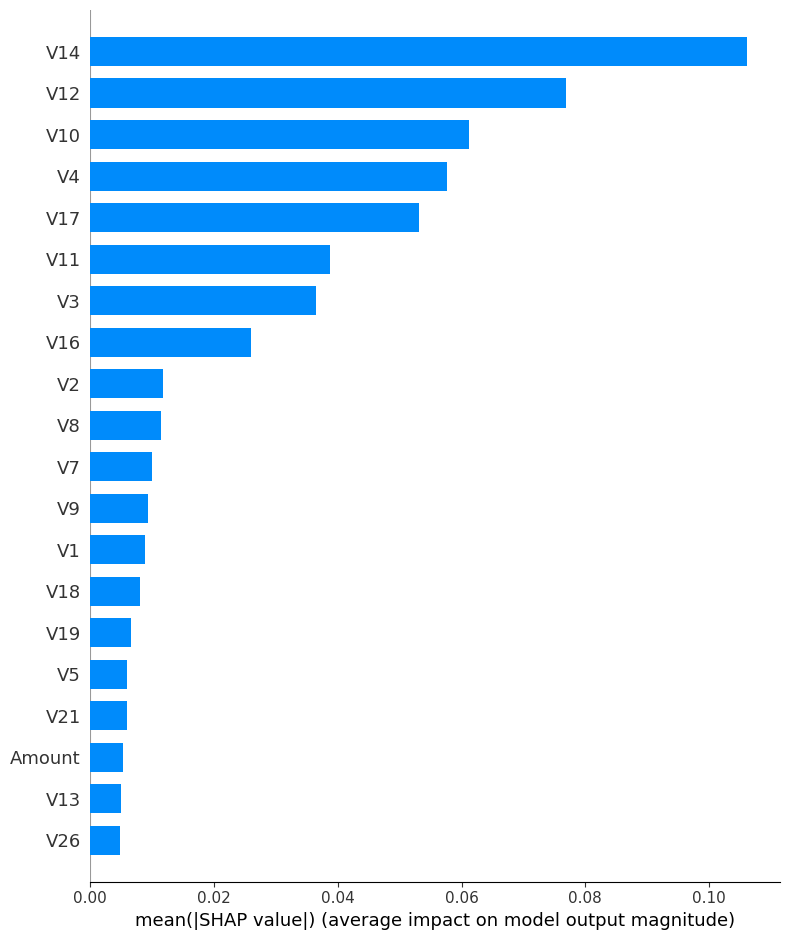

In [19]:

# SHAP bar plot (for dashboard and report)
print("Generating SHAP bar plot...")
shap.summary_plot(shap_values_fraud, X_test_sample, plot_type="bar")

In [23]:
os.makedirs('../outputs', exist_ok=True)

Saving SHAP bar plot as image...


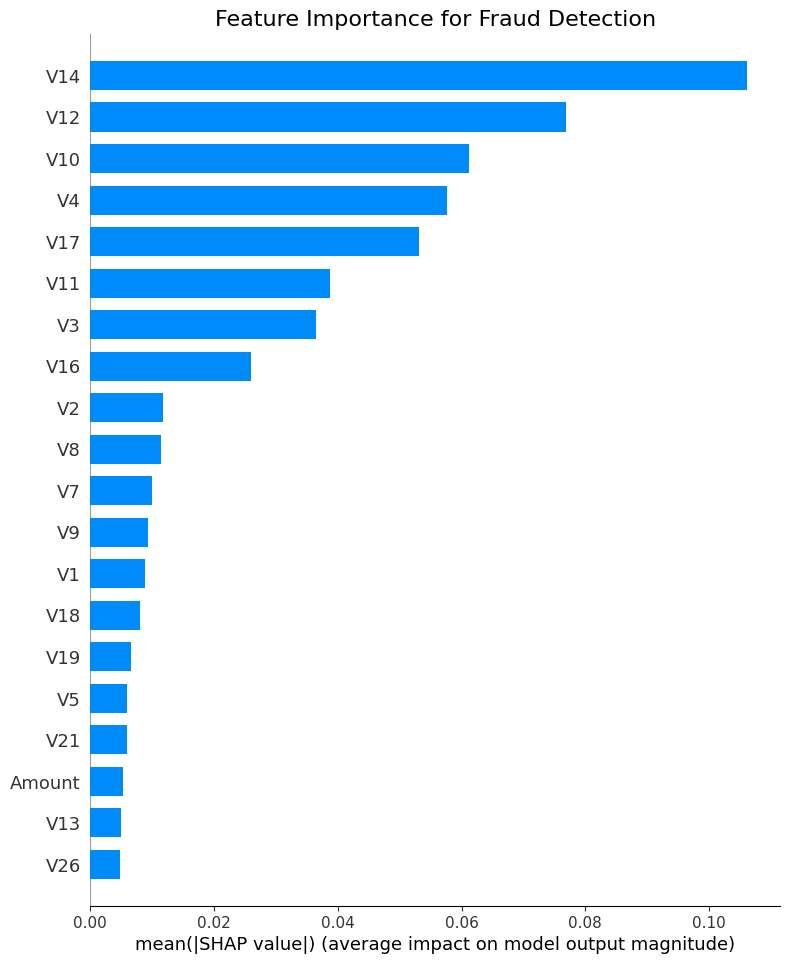

In [24]:
# Save bar plot for Streamlit dashboard
print("Saving SHAP bar plot as image...")
shap.summary_plot(shap_values_fraud, X_test_sample, plot_type="bar", show=False)
plt.title('Feature Importance for Fraud Detection', fontsize=16)
plt.savefig('../outputs/shap_feature_importance_bar.png', bbox_inches='tight')
plt.show()